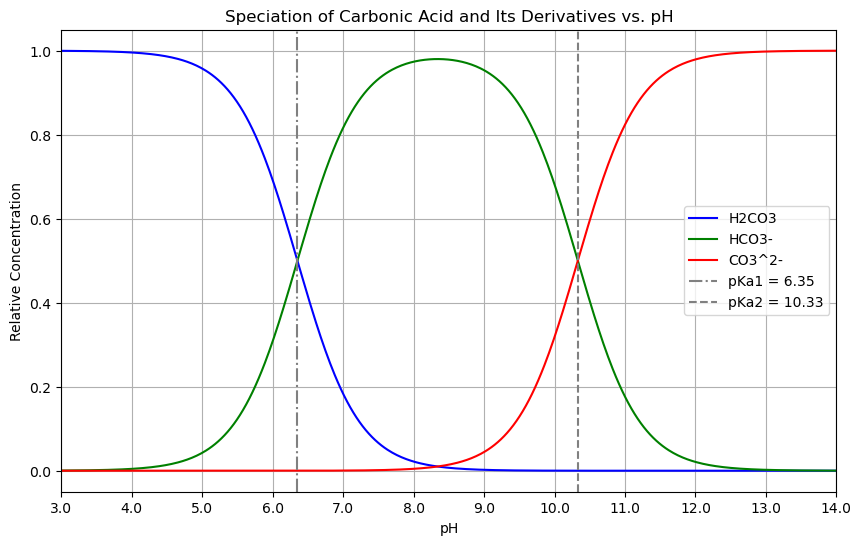

In [20]:
# Speciation plotter

import matplotlib.pyplot as plt
import numpy as np

# Define the pKa values
pKa1 = 6.35
pKa2 = 10.33

# Generate pH values
pH = np.linspace(3, 14, 500)

# Calculate the relative concentrations of H2CO3, HCO3-, and CO3^2-
H2CO3 = 1 / (1 + 10**(pH - pKa1) + 10**(2 * (pH - pKa1) - pKa2 + pKa1))
HCO3 = 10**(pH - pKa1) / (1 + 10**(pH - pKa1) + 10**(2 * (pH - pKa1) - pKa2 + pKa1))
CO3 = 10**(2 * (pH - pKa1) - pKa2 + pKa1) / (1 + 10**(pH - pKa1) + 10**(2 * (pH - pKa1) - pKa2 + pKa1))

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(pH, H2CO3, label='H2CO3', color='blue')
plt.plot(pH, HCO3, label='HCO3-', color='green')
plt.plot(pH, CO3, label='CO3^2-', color='red')

# Add labels and title
plt.xlabel('pH')
plt.ylabel('Relative Concentration')
plt.title('Speciation of Carbonic Acid and Its Derivatives vs. pH')
plt.axvline(pKa1, color='gray', linestyle='-.', label=f'pKa1 = {pKa1}')
plt.axvline(pKa2, color='gray', linestyle='--', label=f'pKa2 = {pKa2}')
plt.legend()
plt.grid(True)

# Reduce decimal places in x-axis
plt.xticks(np.arange(0, 15, 1), [f'{x:.1f}' for x in np.arange(0, 15, 1)])

# Set x axis
plt.xlim(3, 14)

plt.show()


In [8]:
# pH calculator

# Import necessary libraries
import numpy as np

# Function to calculate the hydrogen ion concentration from pH
def pH_to_H(pH):
    return 10**(-pH)

# Function to calculate pH from hydrogen ion concentration
def H_to_pH(H):
    return -np.log10(H)

# Function to calculate the hydroxide ion concentration from hydrogen ion concentration
def H_to_OH(H):
    return 10**(-14) / H

# Start of the script
def main():
    # Step 1: Get the initial pH
    starting_pH = float(input("Enter the starting pH of the solution: "))
    
    # Calculate concentrations of H+ and OH- ions
    H_concentration = pH_to_H(starting_pH)
    OH_concentration = H_to_OH(H_concentration)
    
    # Print the concentrations
    print(f"H+ concentration: {H_concentration:.2e} M")
    print(f"OH- concentration: {OH_concentration:.2e} M")
    
    # Step 2: Get the volume of the solution
    V_solution = float(input("Enter the volume of the solution (in liters): "))
    
    # Calculate the absolute amount of moles of H+ and OH- ions
    moles_H = H_concentration * V_solution
    moles_OH = OH_concentration * V_solution
    
    # Print the amounts in moles
    print(f"Moles of H+ ions: {moles_H:.2e} mol")
    print(f"Moles of OH- ions: {moles_OH:.2e} mol")
    
    # Step 3: Get the desired pH
    desired_pH = float(input("Enter the desired pH of the solution: "))
    
    # Calculate the required H+ concentration for the desired pH
    desired_H_concentration = pH_to_H(desired_pH)
    desired_OH_concentration = H_to_OH(desired_H_concentration)
    
    # Calculate the change in moles needed to reach the desired pH
    change_in_moles_H = desired_H_concentration * V_solution - moles_H
    change_in_moles_OH = desired_OH_concentration * V_solution - moles_OH
    
    # Print the required change in moles
    if change_in_moles_H > 0:
        print(f"Moles of H+ ions needed to be added: {change_in_moles_H:.2e} mol")
    else:
        print(f"Moles of OH- ions needed to be added: {-change_in_moles_H:.2e} mol")
    
    # Step 4: Get the molar concentration and type of solution to be added
    molar_concentration = float(input("Enter the molar concentration of the solution to be added (in M): "))
    proticity = int(input("Enter the proticity (1 for monoprotic, 2 for diprotic, etc.): "))
    
    # Calculate the volume of the solution to be added
    if change_in_moles_H > 0:
        volume_to_add = change_in_moles_H / (molar_concentration * proticity)
    else:
        volume_to_add = -change_in_moles_H / (molar_concentration * proticity)
    
    # Print the required volume
    print(f"Volume of the solution to be added: {volume_to_add:.2e} liters")

# Run the script
if __name__ == "__main__":
    main()


Enter the starting pH of the solution:  13


H+ concentration: 1.00e-13 M
OH- concentration: 1.00e-01 M


Enter the volume of the solution (in liters):  50


Moles of H+ ions: 5.00e-12 mol
Moles of OH- ions: 5.00e+00 mol


Enter the desired pH of the solution:  8


Moles of H+ ions needed to be added: 5.00e-07 mol


Enter the molar concentration of the solution to be added (in M):  1
Enter the proticity (1 for monoprotic, 2 for diprotic, etc.):  1


Volume of the solution to be added: 5.00e-07 liters
